# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
import random

seed = 1337
random.seed(1337)
np.random.seed(1337)
torch.manual_seed(1337)
torch.backends.cudnn.deterministic = True

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher.app',seed=seed)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  4.81451988e+00 -1.00000000e+00
  6.38908386e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
  8.53890657e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
# env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
# states = env_info.vector_observations                  # get the current state (for each agent)
# scores = np.zeros(num_agents)                          # initialize the score (for each agent)
# while True:
#     actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#     actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#     env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#     next_states = env_info.vector_observations         # get next state (for each agent)
#     rewards = env_info.rewards                         # get reward (for each agent)
#     dones = env_info.local_done                        # see if episode finished
#     scores += env_info.rewards                         # update the score (for each agent)
#     states = next_states                               # roll over states to next time step
#     if np.any(dones):                                  # exit loop if episode finished
#         break
# print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [6]:
# env.close()

In [7]:
# Run agent

def run_agent(model_path):
    from ppo_agent import Agent

    brain_name = env.brain_names[0]
    brain = env.brains[brain_name]
    env_info = env.reset(train_mode=False)[brain_name]
    n_observations = env_info.vector_observations.shape[1]
    n_actions = brain.vector_action_space_size
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    agent = Agent(n_observations, n_actions)
    agent.load_state_dict(torch.load(model_path))

    scores = np.zeros(1)                          # initialize the score (for each agent)
    while True:
        obs = torch.Tensor(np.expand_dims(env_info.vector_observations[0], 0))
        with torch.no_grad():
            action, _, _, _ = agent.get_action_and_value(obs)
        torch.clamp(action, -1, 1)
        action = action.numpy()
        env_info = env.step(action)[brain_name]           # send all actions to the environment
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))
# run_agent('checkpoints/model_step_976.pickle')

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [8]:
from ppo import run_ppo

run_ppo(env)

update 1/976. Last update in 4.0531158447265625e-06s
last 100 returns: 0.0
update 2/976. Last update in 6.885843992233276s
last 100 returns: 0.0
update 3/976. Last update in 6.480859756469727s
last 100 returns: 0.029999999329447746
update 4/976. Last update in 6.139479160308838s
last 100 returns: 0.03999999910593033
update 5/976. Last update in 6.285266160964966s
last 100 returns: 0.06727272576906464
update 6/976. Last update in 6.2827839851379395s
last 100 returns: 0.15384615040742433
update 7/976. Last update in 6.2977049350738525s
last 100 returns: 0.1933333290119966
update 8/976. Last update in 6.172911882400513s
last 100 returns: 0.20999999530613422
update 9/976. Last update in 7.015091896057129s
last 100 returns: 0.20684210063987657
update 10/976. Last update in 6.390175104141235s
last 100 returns: 0.25380951813643887
update 11/976. Last update in 6.340254783630371s
last 100 returns: 0.2669565157721872
update 12/976. Last update in 6.292880058288574s
last 100 returns: 0.311599993

last 100 returns: 3.387299924287945
update 98/976. Last update in 6.147700309753418s
last 100 returns: 3.4397999231144785
update 99/976. Last update in 6.099356174468994s
last 100 returns: 3.5185999213531614
update 100/976. Last update in 6.10172700881958s
last 100 returns: 3.544499920774251
update 101/976. Last update in 6.102934122085571s
last 100 returns: 3.6263999189436436
update 102/976. Last update in 6.127309083938599s
last 100 returns: 3.727399916686118
update 103/976. Last update in 6.1231160163879395s
last 100 returns: 3.759899915959686
update 104/976. Last update in 6.095551013946533s
last 100 returns: 3.7773999155685307
update 105/976. Last update in 6.127726078033447s
last 100 returns: 3.7767999155819414
update 106/976. Last update in 6.089958906173706s
last 100 returns: 3.875799913369119
update 107/976. Last update in 6.125969886779785s
last 100 returns: 3.9715999112278224
update 108/976. Last update in 6.138386011123657s
last 100 returns: 4.0669999090954665
update 109/97

last 100 returns: 6.956899844501168
update 194/976. Last update in 6.195181131362915s
last 100 returns: 7.146499840263277
update 195/976. Last update in 6.10779070854187s
last 100 returns: 7.207199838906527
update 196/976. Last update in 6.123183250427246s
last 100 returns: 7.28519983716309
update 197/976. Last update in 6.111032009124756s
last 100 returns: 7.273699837420136
update 198/976. Last update in 6.126490831375122s
last 100 returns: 7.353699835631996
update 199/976. Last update in 6.112127065658569s
last 100 returns: 7.383799834959209
update 200/976. Last update in 6.088786363601685s
last 100 returns: 7.358899835515768
update 201/976. Last update in 6.141400098800659s
last 100 returns: 7.444099833611399
update 202/976. Last update in 6.164837121963501s
last 100 returns: 7.447399833537638
update 203/976. Last update in 6.092440843582153s
last 100 returns: 7.470599833019078
update 204/976. Last update in 6.144695997238159s
last 100 returns: 7.476299832891673
update 205/976. Last

last 100 returns: 6.428899856302888
update 290/976. Last update in 6.109398126602173s
last 100 returns: 6.347399858124554
update 291/976. Last update in 6.124492168426514s
last 100 returns: 6.339099858310074
update 292/976. Last update in 6.104968786239624s
last 100 returns: 6.362799857780337
update 293/976. Last update in 6.1084558963775635s
last 100 returns: 6.419399856515229
update 294/976. Last update in 6.147665023803711s
last 100 returns: 6.386099857259541
update 295/976. Last update in 6.093541860580444s
last 100 returns: 6.376999857462943
update 296/976. Last update in 6.041063070297241s
last 100 returns: 6.408299856763333
update 297/976. Last update in 6.138083219528198s
last 100 returns: 6.331499858479947
update 298/976. Last update in 6.104863882064819s
last 100 returns: 6.3004998591728505
update 299/976. Last update in 6.104832887649536s
last 100 returns: 6.184899861756712
update 300/976. Last update in 6.091955900192261s
last 100 returns: 6.101999863609672
update 301/976. 

last 100 returns: 3.998099910635501
update 386/976. Last update in 6.120335102081299s
last 100 returns: 3.9885999108478427
update 387/976. Last update in 6.119662046432495s
last 100 returns: 4.006499910447746
update 388/976. Last update in 6.090030908584595s
last 100 returns: 3.94979991171509
update 389/976. Last update in 6.099756956100464s
last 100 returns: 4.050899909455329
update 390/976. Last update in 6.147493839263916s
last 100 returns: 4.018499910179526
update 391/976. Last update in 6.113002061843872s
last 100 returns: 4.0257999100163575
update 392/976. Last update in 6.098545789718628s
last 100 returns: 4.025699910018593
update 393/976. Last update in 6.113771915435791s
last 100 returns: 3.9835999109596014
update 394/976. Last update in 6.127429962158203s
last 100 returns: 4.031099909897893
update 395/976. Last update in 6.097898006439209s
last 100 returns: 4.023399910070002
update 396/976. Last update in 6.112011909484863s
last 100 returns: 4.004799910485745
update 397/976. 

last 100 returns: 3.2497999273613094
update 482/976. Last update in 6.099116086959839s
last 100 returns: 3.266299926992506
update 483/976. Last update in 6.1416168212890625s
last 100 returns: 3.2503999273478983
update 484/976. Last update in 6.105889081954956s
last 100 returns: 3.2547999272495507
update 485/976. Last update in 6.137624740600586s
last 100 returns: 3.2946999263577164
update 486/976. Last update in 6.145653963088989s
last 100 returns: 3.247799927406013
update 487/976. Last update in 6.124717712402344s
last 100 returns: 3.1607999293506146
update 488/976. Last update in 6.159029960632324s
last 100 returns: 3.158099929410964
update 489/976. Last update in 6.095210075378418s
last 100 returns: 3.177399928979576
update 490/976. Last update in 6.1203038692474365s
last 100 returns: 3.0936999308504163
update 491/976. Last update in 6.079877138137817s
last 100 returns: 3.095699930805713
update 492/976. Last update in 6.111774921417236s
last 100 returns: 3.096299930792302
update 493

last 100 returns: 2.34239994764328
update 577/976. Last update in 6.196560859680176s
last 100 returns: 2.3690999470464886
update 578/976. Last update in 6.17254900932312s
last 100 returns: 2.3850999466888605
update 579/976. Last update in 6.11932897567749s
last 100 returns: 2.359499947261065
update 580/976. Last update in 6.222922086715698s
last 100 returns: 2.366999947093427
update 581/976. Last update in 6.170471906661987s
last 100 returns: 2.307399948425591
update 582/976. Last update in 6.173266887664795s
last 100 returns: 2.3516999474354088
update 583/976. Last update in 6.166136980056763s
last 100 returns: 2.3217999481037257
update 584/976. Last update in 6.173186779022217s
last 100 returns: 2.37969994680956
update 585/976. Last update in 6.167623996734619s
last 100 returns: 2.374699946921319
update 586/976. Last update in 6.159787893295288s
last 100 returns: 2.3834999467246236
update 587/976. Last update in 6.1980719566345215s
last 100 returns: 2.3426999476365746
update 588/976.

last 100 returns: 3.533799921013415
update 672/976. Last update in 6.192167282104492s
last 100 returns: 3.5575999204814432
update 673/976. Last update in 6.203435182571411s
last 100 returns: 3.6424999185837805
update 674/976. Last update in 6.22537899017334s
last 100 returns: 3.6501999184116722
update 675/976. Last update in 6.210471868515015s
last 100 returns: 3.487799922041595
update 676/976. Last update in 6.221804141998291s
last 100 returns: 3.570899920184165
update 677/976. Last update in 6.187825918197632s
last 100 returns: 3.5956999196298423
update 678/976. Last update in 6.217436790466309s
last 100 returns: 3.6506999184004965
update 679/976. Last update in 6.222264766693115s
last 100 returns: 3.627399918921292
update 680/976. Last update in 6.199510097503662s
last 100 returns: 3.6269999189302324
update 681/976. Last update in 6.1863977909088135s
last 100 returns: 3.5891999197751283
update 682/976. Last update in 6.2241740226745605s
last 100 returns: 3.6567999182641504
update 68

last 100 returns: 1.694799962118268
update 767/976. Last update in 6.149350881576538s
last 100 returns: 1.6789999624714256
update 768/976. Last update in 6.1874098777771s
last 100 returns: 1.6797999624535442
update 769/976. Last update in 6.2445220947265625s
last 100 returns: 1.6842999623529613
update 770/976. Last update in 6.176652908325195s
last 100 returns: 1.7209999615326523
update 771/976. Last update in 6.281240940093994s
last 100 returns: 1.7290999613516034
update 772/976. Last update in 6.209205865859985s
last 100 returns: 1.7491999609023332
update 773/976. Last update in 6.195570945739746s
last 100 returns: 1.7875999600440264
update 774/976. Last update in 6.168163061141968s
last 100 returns: 1.8071999596059323
update 775/976. Last update in 6.10855770111084s
last 100 returns: 1.7391999611258506
update 776/976. Last update in 6.215023040771484s
last 100 returns: 1.7463999609649181
update 777/976. Last update in 6.19275164604187s
last 100 returns: 1.8174999593757093
update 778

last 100 returns: 2.1605999517068266
update 862/976. Last update in 6.180675029754639s
last 100 returns: 2.176999951340258
update 863/976. Last update in 6.214717864990234s
last 100 returns: 2.1892999510653315
update 864/976. Last update in 6.191252946853638s
last 100 returns: 2.191599951013923
update 865/976. Last update in 6.242998123168945s
last 100 returns: 2.1927999509871006
update 866/976. Last update in 6.192958354949951s
last 100 returns: 2.1674999515525997
update 867/976. Last update in 6.248353004455566s
last 100 returns: 2.1641999516263604
update 868/976. Last update in 6.199146032333374s
last 100 returns: 2.1979999508708716
update 869/976. Last update in 6.202008247375488s
last 100 returns: 2.2168999504484237
update 870/976. Last update in 6.223819971084595s
last 100 returns: 2.2473999497666957
update 871/976. Last update in 6.223259925842285s
last 100 returns: 2.225099950265139
update 872/976. Last update in 6.195390939712524s
last 100 returns: 2.288399948850274
update 873

last 100 returns: 2.9575999338924883
update 957/976. Last update in 6.2481911182403564s
last 100 returns: 2.9645999337360265
update 958/976. Last update in 6.2631189823150635s
last 100 returns: 2.8996999351866544
update 959/976. Last update in 6.247629165649414s
last 100 returns: 2.954499933961779
update 960/976. Last update in 6.280591011047363s
last 100 returns: 2.9709999335929753
update 961/976. Last update in 6.404138088226318s
last 100 returns: 3.0339999321848152
update 962/976. Last update in 6.60870099067688s
last 100 returns: 3.1620999293215575
update 963/976. Last update in 6.359098672866821s
last 100 returns: 3.1480999296344816
update 964/976. Last update in 6.290126085281372s
last 100 returns: 3.1241999301686882
update 965/976. Last update in 6.7555460929870605s
last 100 returns: 3.0941999308392405
update 966/976. Last update in 7.121385097503662s
last 100 returns: 3.058899931628257
update 967/976. Last update in 6.43977689743042s
last 100 returns: 3.0323999322205784
update 

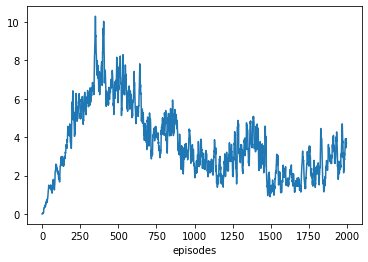

In [12]:
def copy_model_and_plot_learning_curve():
    import pickle
    import matplotlib.pyplot as plt
    from collections import deque
    import os
    import datetime
    import shutil
    
    datetime_stamp = datetime.datetime.now().strftime('%Y%m%d_%H:%M:%S')
    plot_path = f'checkpoints/{datetime_stamp}'
    
    if not os.path.exists(plot_path):
        os.makedirs(plot_path)
    else:
        print(f'directory {plot_path} already exists')
        return
    
    shutil.copyfile('checkpoints/eplen_and_returns_976.pickle', f'{plot_path}/eplen_and_returns.pickle')
    shutil.copyfile('checkpoints/model_step_976.pickle', f'{plot_path}/final_model.pickle')

    with open(f'{plot_path}/eplen_and_returns.pickle', 'rb') as f:
        _, total_rewards = zip(*pickle.load(f))

    smoothed = []
    queue = deque([], maxlen=10)
    for r in total_rewards:
        queue.append(r)
        smoothed.append(sum(queue)/len(queue))
    fig,ax = plt.subplots()
    ax.plot(smoothed)
    ax.set_xlabel('episodes')
    plt.savefig(f'{plot_path}/learning_curve.png')
    plt.show()
copy_model_and_plot_learning_curve()

In [10]:
path = f'checkpoints/03/eplen_and_returns_976.pickle'
import os
print(os.path.dirname(path))

checkpoints/03


In [11]:
# from ddpg_agent import Agent

# agent = Agent(state_size=33, action_size=4, random_seed=2)
# scores = agent.run_unity_ddpg(env)
# env.close()

# fig = plt.figure()
# ax = fig.add_subplot(111)
# plt.plot(np.arange(1, len(scores)+1), scores)
# plt.ylabel('Score')
# plt.xlabel('Episode #')
# plt.show()